In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
df  = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
# Rename columns
df=df.rename({'Age_08_04':'Age', 'cc':'CC'},axis=1)
df

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
# Create variable X_features containing list of features useful for building the model
X_features = df.columns

In [ ]:
# Ignore Constant Features like 'Cylinders' that doesn't affect the prediction
X_features = ['Age','KM','Fuel_Type','HP','Automatic','CC','Doors','Gears','Weight']

In [ ]:
X_features

['Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 'Doors', 'Gears', 'Weight']

In [ ]:
df.shape

(1436, 11)

In [ ]:
# Check for duplicate Columns
df[df.duplicated()]

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
# Drop duplicate column
df=df.drop_duplicates().reset_index(drop=True)
df.shape

(1435, 11)

#Encoding Categorical Columns

* Gears & Doors are not categorical data.
* Since, we can perform mathematical Ops. on them.
* Therefore, they should be Treated as numerical Variables

In [ ]:
df['Automatic'].unique()

array([0, 1])

In [ ]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
# df['Fuel_Type'] = df['Fuel_Type']. replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2})

# Example of using get_dummies function
pd.get_dummies(df['Fuel_Type'])[0:5].astype(int)

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
categorical_features = ['Fuel_Type','Automatic']
encoded_df = pd.get_dummies(df[X_features],columns=categorical_features, drop_first=True)

In [ ]:
encoded_df.columns

Index(['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Automatic_1'],
      dtype='object')

* Above, the Fuel_Type feature has three distinct values: Petrol, Diesel, and CNG,
* then pd.get_dummies will create two new columns: Fuel_Type_Diesel and Fuel_Type_CNG.
* The Fuel_Type_Petrol column will be dropped.

* This is useful when you want to avoid perfect multicollinearity in your data.
* Perfect multicollinearity occurs when two or more predictor variables are perfectly correlated, which can cause problems in your model.
* By dropping the first level of each categorical feature using 'drop_first=True' , you can avoid creating perfect multicollinearity between the new dummy variables.

In [ ]:
# Reassign the new features to the variable X_features, to keep track of all the features which can be used for model building
X_features = encoded_df.columns
X_features

Index(['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Automatic_1'],
      dtype='object')

In [ ]:
# After Encoding, change the DataTypes to int
encoded_df['Fuel_Type_Diesel']=encoded_df['Fuel_Type_Diesel'].astype('int64')
encoded_df['Fuel_Type_Petrol']=encoded_df['Fuel_Type_Petrol'].astype('int64')
encoded_df['Automatic_1']=encoded_df['Automatic_1'].astype('int64')
encoded_df.dtypes

Age                 int64
KM                  int64
HP                  int64
CC                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_Diesel    int64
Fuel_Type_Petrol    int64
Automatic_1         int64
dtype: object

# Splitting the data into Train and Validation sets

In [ ]:
# add_constant function in the statsmodels library adds a constant term to the given data.
# This is useful for fitting linear regression models, as it allows the model to have an intercept.
X = sm.add_constant(encoded_df)
Y = df['Price']

train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.8, random_state=42)

# Building the Model on Training Dataset

In [ ]:
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.869     
Dependent Variable:      Price               AIC:                   19760.5719
Date:                    2024-04-23 16:32    BIC:                   19816.0754
No. Observations:        1148                Log-Likelihood:        -9869.3   
Df Model:                10                  F-statistic:           765.0     
Df Residuals:            1137                Prob (F-statistic):    0.00      
R-squared:               0.871               Scale:                 1.7335e+06
------------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
------------------------------------------------------------------------------
const            -14115.2372 1860.0554  -7.5886 0.0000 -17764.7638 -10465.7107
Age                -121.2292    2.9034 -41.7540 0.0000   -126.9258   -115.5325
KM                   -0.0160    0.0015 -10.8809 0.0000     -0.0189     -0.0131
HP                   16.0754    3.9939   4.0250 0.0001      8.2393     23.9116
CC                   -0.0471    0.0911  -0.5170 0.6052     -0.2259      0.1317
Doors               -88.0972   45.2410  -1.9473 0.0517   -176.8624      0.6681
Gears               455.0119  229.4400   1.9831 0.0476      4.8385    905.1852
Weight               26.3612    1.4998  17.5767 0.0000     23.4186     29.3038
Fuel_Type_Diesel   -389.6838  429.2857  -0.9077 0.3642  -1231.9649    452.5972
Fuel_Type_Petrol   1128.9331  381.9515   2.9557 0.0032    379.5241   1878.3420
Automatic_1         268.8222  183.5555   1.4645 0.1433    -91.3233    628.9678
------------------------------------------------------------------------------
Omnibus:                  231.718          Durbin-Watson:             1.955   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          2442.134
Skew:                     -0.604           Prob(JB):                  0.000   
Kurtosis:                 10.042           Condition No.:             3793922 
==============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

* As per the p-value(>0.05), features CC, Doors, Fuel_Type_Diesel, Automatic_1 are in InSignificant
* These features Do Not influence the selling
* And this can be due to 'multi-collinearity' effect of variables

# Handling Multi-Collinearity using Variance Inflation factor [VIF]

* The existence of high correlation between independent variables is called Multi-collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
  X_matrix = X.to_numpy()
  vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
  vif_factors = pd.DataFrame()
  vif_factors['column']=X.columns
  vif_factors['VIF']=vif
  # print(X_matrix) # Prints Numpy array

  return vif_factors

In [ ]:
# Now call above method with X_features
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,Age,17.124003
1,KM,8.668100
2,HP,96.878874
3,CC,18.112702
4,Doors,22.969257
5,Gears,531.195891
6,Weight,652.805792
7,Fuel_Type_Diesel,12.565234
8,Fuel_Type_Petrol,75.453528
9,Automatic_1,1.149317


# Checking Correlation of Columns with Large VIFs(>4)

In [ ]:
columns_with_large_vif = vif_factors[vif_factors.VIF>4].column

Text(0.5, 1.0, 'Heatmap showing Correlation btw Features')

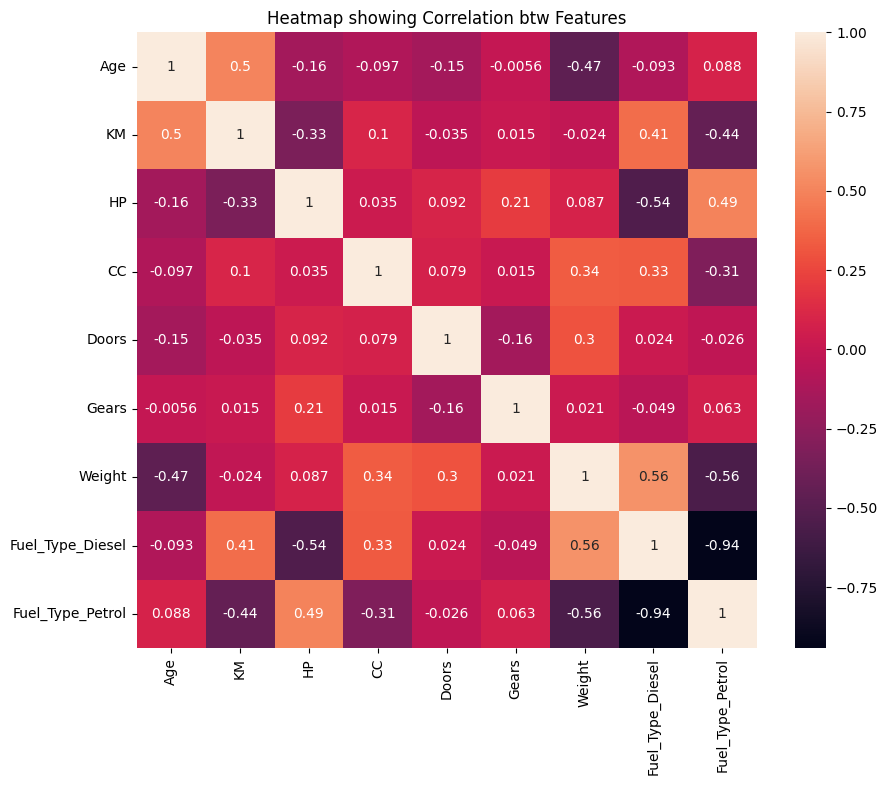

In [ ]:
# Heatmap for features with VIF > 4
plt.figure(figsize=(10,8))
sns.heatmap(X[columns_with_large_vif].corr(), annot=True)
plt.title("Heatmap showing Correlation btw Features")

* Weight & Fuel_Type_Diesel are correlated.
* Hence, can be removed

In [ ]:
columns_to_be_removed = ['Fuel_Type_Diesel','Weight']

In [ ]:
X_new_features = list(set(X_features)-set(columns_to_be_removed))

In [ ]:
get_vif_factors(X[X_new_features])

,column,VIF
0,Age,16.712525
1,KM,8.634843
2,Doors,18.365230
3,CC,17.403159
4,Automatic_1,1.089525
5,Gears,94.011835
6,HP,72.844651
7,Fuel_Type_Petrol,17.103266


# Building a New Model after Removing Multi-Collinearlity


In [ ]:
train_X = train_X[X_new_features]

model_2 = sm.OLS(train_y, train_X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              7481.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:32:15   Log-Likelihood:                         -10061.
No. Observations:                1148   AIC:                                  2.014e+04
Df Residuals:                    1140   BIC:                                  2.018e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age               -138.5023      3.164    -43.769      0.000    -144.711    -132.294
KM                  -0.0188      0.002    -10.910      0.000      -0.022      -0.015
Doors              336.6624     47.456      7.094      0.000     243.552     429.773
CC                   0.1782      0.106      1.684      0.092      -0.029       0.386
Automatic_1       1173.8895    209.320      5.608      0.000     763.194    1584.584
Gears             2893.8860     87.553     33.053      0.000    2722.103    3065.669
HP                  48.0703      3.793     12.675      0.000      40.629      55.512
Fuel_Type_Petrol -1564.9186    198.970     -7.865      0.000   -1955.307   -1174.530
==============================================================================
Omnibus:                      162.694   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.947
Skew:                           0.494   Prob(JB):                    1.31e-209
Kurtosis:                       7.374   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* From above summary, all the features except 'CC' are significant

In [ ]:
# Let's store all those signifcant variables separately, and Train the model using These Features
significant_vars = ['CC','Fuel_Type_Petrol','HP','Automatic_1','Doors','Gears','Age','KM']

train_X = train_X[significant_vars]

model_3 = sm.OLS(train_y, train_X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              7481.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:32:15   Log-Likelihood:                         -10061.
No. Observations:                1148   AIC:                                  2.014e+04
Df Residuals:                    1140   BIC:                                  2.018e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CC                   0.1782      0.106      1.684      0.092      -0.029       0.386
Fuel_Type_Petrol -1564.9186    198.970     -7.865      0.000   -1955.307   -1174.530
HP                  48.0703      3.793     12.675      0.000      40.629      55.512
Automatic_1       1173.8895    209.320      5.608      0.000     763.194    1584.584
Doors              336.6624     47.456      7.094      0.000     243.552     429.773
Gears             2893.8860     87.553     33.053      0.000    2722.103    3065.669
Age               -138.5023      3.164    -43.769      0.000    -144.711    -132.294
KM                  -0.0188      0.002    -10.910      0.000      -0.022      -0.015
==============================================================================
Omnibus:                      162.694   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.947
Skew:                           0.494   Prob(JB):                    1.31e-209
Kurtosis:                       7.374   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We can draw following inference from Latest Model:
* All the variables are significant as p-value < 0.05
* Model provides very High R_squared value of 98.1%
* This means, 98.1% variation in the car price can be explained by  the given significant_variables

# Residual analysis in MLR

## Test for Normality of Residuals (Q-Q Plot)

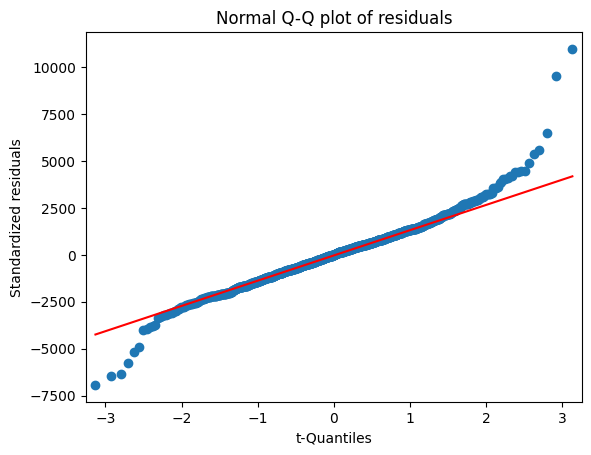

In [ ]:
qqplot=sm.qqplot(model_3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.xlabel("t-Quantiles")
plt.ylabel("Standardized residuals")
plt.show()

In [ ]:
list(np.where(model_3.resid>7500))

[array([ 55, 366])]

In [ ]:
train_X_new = train_X.drop([55, 366], axis=0)
train_y_new = train_y.drop([55, 366], axis=0)

model_3 = sm.OLS(train_y, train_X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.851e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:33:03   Log-Likelihood:                         -3911.7
No. Observations:                1148   AIC:                                      7839.
Df Residuals:                    1140   BIC:                                      7880.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.6058      0.015    -40.598      0.000      -0.635      -0.577
KM               -8.856e-05   8.12e-06    -10.908      0.000      -0.000   -7.26e-05
HP                   0.1902      0.018     10.636      0.000       0.155       0.225
CC                   0.0012      0.000      2.423      0.016       0.000       0.002
Doors                2.1775      0.224      9.730      0.000       1.738       2.617
Gears               23.1364      0.413     56.038      0.000      22.326      23.946
Fuel_Type_Petrol    -5.0435      0.938     -5.375      0.000      -6.884      -3.203
Automatic_1          5.8025      0.987      5.878      0.000       3.866       7.739
==============================================================================
Omnibus:                      117.162   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.111
Skew:                          -0.346   Prob(JB):                    6.42e-122
Kurtosis:                       6.345   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

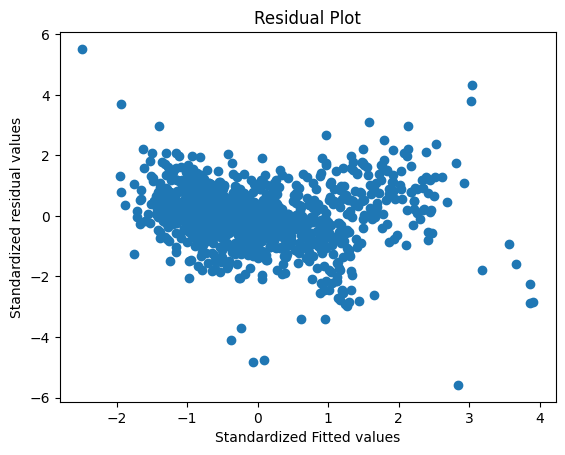

In [ ]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Detecting Influencer

* influence_plot() is used to find highly influencial observations
* leverage value > 3(k+1)/n are considered as highly influencial obs

In [ ]:
k = train_X.shape[1]
n = train_X.shape[0]
print("Number of variables:",k,"and number of observations:",n)

Number of variables: 8 and number of observations: 1148


In [ ]:
leverage_cutoff = 3*((k+1)/n)
print("cutoff for leverage value:", round(leverage_cutoff, 3))

cutoff for leverage value: 0.024


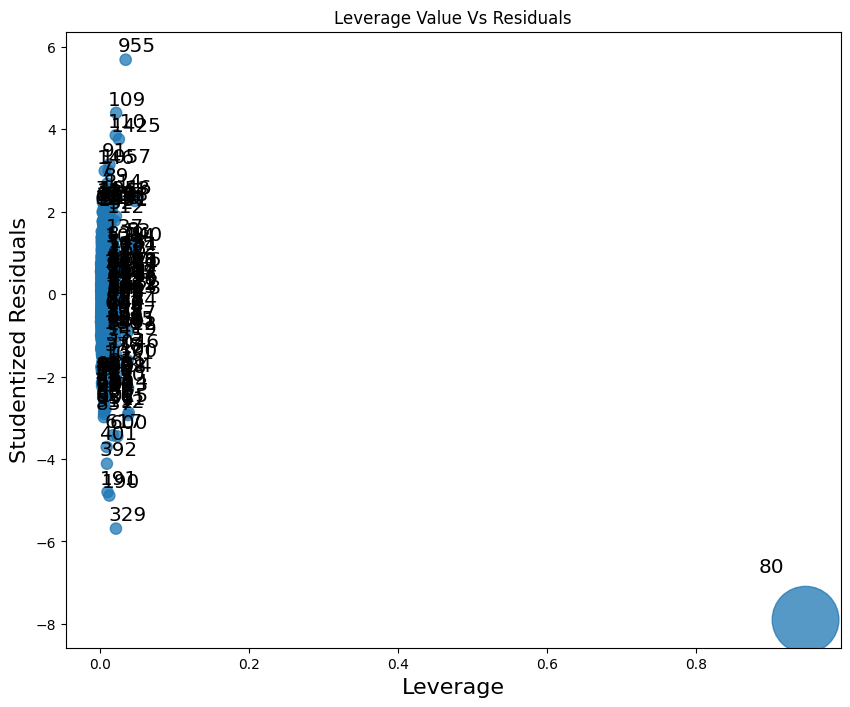

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
influence_plot(model_3, ax=ax)
plt.title('Leverage Value Vs Residuals')
plt.show()

In [ ]:
train_X_new = train_X.drop([80], axis=0)
train_y_new = train_y.drop([80], axis=0)

In [ ]:
model_4 = sm.OLS(train_y_new, train_X_new).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.001e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:33:07   Log-Likelihood:                         -3878.2
No. Observations:                1147   AIC:                                      7772.
Df Residuals:                    1139   BIC:                                      7813.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.6161      0.015    -42.214      0.000      -0.645      -0.587
KM               -9.236e-05   7.92e-06    -11.656      0.000      -0.000   -7.68e-05
HP                   0.0796      0.022      3.563      0.000       0.036       0.123
CC                   0.0172      0.002      8.260      0.000       0.013       0.021
Doors                1.7632      0.224      7.864      0.000       1.323       2.203
Gears               19.3085      0.630     30.658      0.000      18.073      20.544
Fuel_Type_Petrol     3.9765      1.463      2.718      0.007       1.106       6.847
Automatic_1          5.5577      0.962      5.777      0.000       3.670       7.445
==============================================================================
Omnibus:                       85.256   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.756
Skew:                          -0.214   Prob(JB):                     1.86e-76
Kurtosis:                       5.667   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Transforming response Variable

In [ ]:
train_y = np.sqrt(train_y)

model_5 = sm.OLS(train_y_new, train_X_new).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.001e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:33:08   Log-Likelihood:                         -3878.2
No. Observations:                1147   AIC:                                      7772.
Df Residuals:                    1139   BIC:                                      7813.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.6161      0.015    -42.214      0.000      -0.645      -0.587
KM               -9.236e-05   7.92e-06    -11.656      0.000      -0.000   -7.68e-05
HP                   0.0796      0.022      3.563      0.000       0.036       0.123
CC                   0.0172      0.002      8.260      0.000       0.013       0.021
Doors                1.7632      0.224      7.864      0.000       1.323       2.203
Gears               19.3085      0.630     30.658      0.000      18.073      20.544
Fuel_Type_Petrol     3.9765      1.463      2.718      0.007       1.106       6.847
Automatic_1          5.5577      0.962      5.777      0.000       3.670       7.445
==============================================================================
Omnibus:                       85.256   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.756
Skew:                          -0.214   Prob(JB):                     1.86e-76
Kurtosis:                       5.667   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

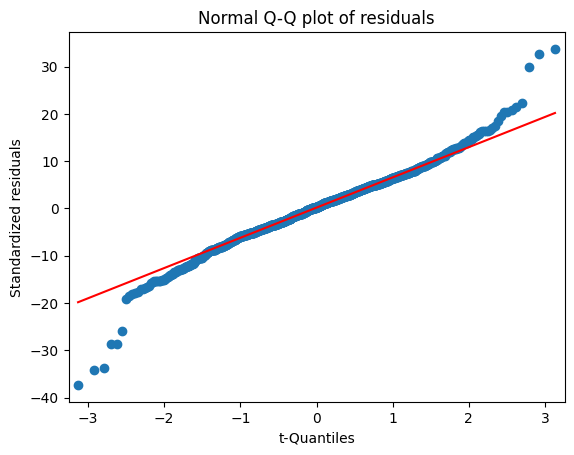

In [ ]:
qqplot=sm.qqplot(model_5.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.xlabel("t-Quantiles")
plt.ylabel("Standardized residuals")
plt.show()

# Making predictions on validation set

In [ ]:
pred_y = np.power(model_3.predict(test_X[train_X.columns]),2)

In [ ]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

1568.9581646392817

# Measuring R-squared value

In [ ]:
np.round(metrics.r2_score(pred_y, test_y),2)

0.77

# Ridge Regression

In [ ]:
test_X = test_X.drop(['Fuel_Type_Diesel', 'Weight', 'const'], axis=1)

In [ ]:
print(train_X.columns)
print(test_X.columns)

Index(['CC', 'Fuel_Type_Petrol', 'HP', 'Automatic_1', 'Doors', 'Gears', 'Age',
       'KM'],
      dtype='object')
Index(['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Fuel_Type_Petrol',
       'Automatic_1'],
      dtype='object')


In [ ]:
train_X = train_X.reindex(columns=['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Fuel_Type_Petrol', 'Automatic_1'])
test_X = test_X.reindex(columns=['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Fuel_Type_Petrol', 'Automatic_1'])

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(train_X, train_y)
y_pred = ridgeR.predict(test_X)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - test_y)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= train_X.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


124144945.39053711
            Columns  Coefficient Estimate
0               Age             -0.628841
1                KM             -0.000093
2                HP              0.197852
3                CC              0.000401
4             Doors              0.988457
5             Gears              3.215228
6  Fuel_Type_Petrol             -6.147379
7       Automatic_1              4.577374


In [ ]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(train_X, train_y)
y_pred1 = lasso.predict(test_X)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - test_y)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = train_X.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 124151867.91338043
            Columns  Coefficient Estimate
0               Age             -0.665918
1                KM             -0.000070
2                HP              0.152718
3                CC              0.001748
4             Doors              0.000000
5             Gears              0.000000
6  Fuel_Type_Petrol             -0.000000
7       Automatic_1              0.000000


# Interview Questions:
**1.What is Normalization & Standardization and how is it helpful?**
### Normalization:
- Normalization is the process of scaling a dataset so that all features have a similar range of values.
- This can be helpful for improving the performance of machine learning algorithms, as it can prevent features with larger values from dominating the model.

### Standardization:
- Standardization is a type of normalization that scales a dataset so that all features have a mean of 0 and a standard deviation of 1.
- This can be helpful for improving the machine learning models, as it allows the coefficients of the model to be directly compared.


**2.What techniques can be used to address multicollinearity in multiple linear regression?**

1. Drop highly correlated features:
- Identify features that are highly correlated with each other and drop one or more of them.
2. Use regularization techniques:
- Regularization techniques such as Ridge regression and Lasso regression can help to reduce the impact of multicollinearity by penalizing the model for having large coefficients.
3. Use principal component analysis (PCA):
- PCA can be used to reduce the dimensionality of the data by creating new features that are linear combinations of the original features.
- This can help to reduce the impact of multicollinearity by removing redundant information from the data.


